In [1]:
# Import librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta_archivo = "Grupo 4 - Precio de viviendas.csv"

In [3]:
# cargar la versión CSV:
data = pd.read_csv(ruta_archivo, sep=',', encoding='utf-8')
data.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [37]:
a_probar = "Lot Frontage"
valores = data[a_probar].dropna()
categorias = set(data[a_probar])
len(categorias)

618

In [42]:
for columna in data:
    valores = data[columna].dropna()
    cantidad_nan = len(data[columna]) - len(valores)
    categorias = set(valores)
    largo = len(categorias)
    if largo < 20:
        print(f"{columna} {len(valores)} elementos , nulos: {cantidad_nan},  {categorias}")
    else:
        print(f"{columna} {len(valores)}, nulos: {cantidad_nan}, tiene: {largo} categorias")


Order 2930, nulos: 0, tiene: 2930 categorias
PID 2930, nulos: 0, tiene: 2930 categorias
MS SubClass 2930 elementos , nulos: 0,  {160, 70, 40, 75, 190, 45, 80, 50, 20, 85, 180, 150, 120, 90, 60, 30}
MS Zoning 2930 elementos , nulos: 0,  {'I (all)', 'A (agr)', 'RH', 'FV', 'C (all)', 'RM', 'RL'}
Lot Frontage 2440, nulos: 490, tiene: 128 categorias
Lot Area 2930, nulos: 0, tiene: 1960 categorias
Street 2930 elementos , nulos: 0,  {'Grvl', 'Pave'}
Alley 198 elementos , nulos: 2732,  {'Grvl', 'Pave'}
Lot Shape 2930 elementos , nulos: 0,  {'IR2', 'IR1', 'IR3', 'Reg'}
Land Contour 2930 elementos , nulos: 0,  {'Bnk', 'Low', 'Lvl', 'HLS'}
Utilities 2930 elementos , nulos: 0,  {'NoSewr', 'NoSeWa', 'AllPub'}
Lot Config 2930 elementos , nulos: 0,  {'FR3', 'FR2', 'CulDSac', 'Corner', 'Inside'}
Land Slope 2930 elementos , nulos: 0,  {'Sev', 'Gtl', 'Mod'}
Neighborhood 2930, nulos: 0, tiene: 28 categorias
Condition 1 2930 elementos , nulos: 0,  {'RRNe', 'RRNn', 'PosA', 'PosN', 'Artery', 'Feedr', 'RRAe'

In [35]:
# Columnas que tienen todos los elementos distintos (un indice)
for columna in data:
    if (len(data[columna])==len(set(data[columna]))):
        print(columna)

Order
PID


In [ ]:
# 0   Order            2930 non-null   int64  # Drop es un indice
#  1   PID              2930 non-null   int64  #Drop es un indice 
#  2   MS SubClass      2930 non-null   int64  
#  3   MS Zoning        2930 non-null   object 
#  4   Lot Frontage     2440 non-null   float64 #tiene nan ocultos
#  5   Lot Area         2930 non-null   int64  
#  6   Street           2930 non-null   object 
#  7   Alley            198 non-null    object {'Grvl', 'Pave', nan}
#  8   Lot Shape        2930 non-null   object 
#  9   Land Contour     2930 non-null   object 
#  10  Utilities        2930 non-null   object 
#  11  Lot Config       2930 non-null   object 
 # 12  Land Slope       2930 non-null   object 
 # 13  Neighborhood     2930 non-null   object 
 # 14  Condition 1      2930 non-null   object 
 # 15  Condition 2      2930 non-null   object 
 # 16  Bldg Type        2930 non-null   object 
 # 17  House Style      2930 non-null   object 
 # 18  Overall Qual     2930 non-null   int64  
 # 19  Overall Cond     2930 non-null   int64  
 # 20  Year Built       2930 non-null   int64  
 # 21  Year Remod/Add   2930 non-null   int64  
 # 22  Roof Style       2930 non-null   object 
 # 23  Roof Matl        2930 non-null   object 
 # 24  Exterior 1st     2930 non-null   object 
 # 25  Exterior 2nd     2930 non-null   object 
 # 26  Mas Vnr Type     1155 non-null   object Fachada tipo {'BrkCmn', 'BrkFace', 'CBlock', 'Stone', nan}
 # 27  Mas Vnr Area     2907 non-null   float64
 # 28  Exter Qual       2930 non-null   object 
 # 29  Exter Cond       2930 non-null   object 
 # 30  Foundation       2930 non-null   object 
 # 31  Bsmt Qual        2850 non-null   object Sotano {'Ex', 'Fa', 'Gd', 'Po', 'TA', nan}
 # 32  Bsmt Cond        2850 non-null   object {'Ex', 'Fa', 'Gd', 'Po', 'TA', nan}
 # 33  Bsmt Exposure    2847 non-null   object {'Av', 'Gd', 'Mn', 'No', nan}
 # 34  BsmtFin Type 1   2850 non-null   object  {'ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf', nan}
 # 35  BsmtFin SF 1     2929 non-null   float64
 # 36  BsmtFin Type 2   2849 non-null   object 
 # 37  BsmtFin SF 2     2929 non-null   float64
 # 38  Bsmt Unf SF      2929 non-null   float64
 # 39  Total Bsmt SF    2929 non-null   float64
 # 40  Heating          2930 non-null   object 
 # 41  Heating QC       2930 non-null   object 
 # 42  Central Air      2930 non-null   object 
 # 43  Electrical       2929 non-null   object 
 # 44  1st Flr SF       2930 non-null   int64  
 # 45  2nd Flr SF       2930 non-null   int64  
 # 46  Low Qual Fin SF  2930 non-null   int64  
 # 47  Gr Liv Area      2930 non-null   int64  
 # 48  Bsmt Full Bath   2928 non-null   float64
 # 49  Bsmt Half Bath   2928 non-null   float64
 # 50  Full Bath        2930 non-null   int64  
 # 51  Half Bath        2930 non-null   int64  
 # 52  Bedroom AbvGr    2930 non-null   int64  
 # 53  Kitchen AbvGr    2930 non-null   int64  
 # 54  Kitchen Qual     2930 non-null   object 
 # 55  TotRms AbvGrd    2930 non-null   int64  
 # 56  Functional       2930 non-null   object 
 # 57  Fireplaces       2930 non-null   int64  
 # 58  Fireplace Qu     1508 non-null   object {'Ex', 'Fa', 'Gd', 'Po', 'TA', nan}
 # 59  Garage Type      2773 non-null   object 
 # 60  Garage Yr Blt    2771 non-null   float64
 # 61  Garage Finish    2771 non-null   object 
 # 62  Garage Cars      2929 non-null   float64
 # 63  Garage Area      2929 non-null   float64
 # 64  Garage Qual      2771 non-null   object 
 # 65  Garage Cond      2771 non-null   object 
 # 66  Paved Drive      2930 non-null   object 
 # 67  Wood Deck SF     2930 non-null   int64  
 # 68  Open Porch SF    2930 non-null   int64  
 # 69  Enclosed Porch   2930 non-null   int64  
 # 70  3Ssn Porch       2930 non-null   int64  
 # 71  Screen Porch     2930 non-null   int64  
 # 72  Pool Area        2930 non-null   int64  
 # 73  Pool QC          13 non-null     object  EXcelent Good, TA typical/average FA Fair (Regular)
 # 74  Fence            572 non-null    object  {'GdPrv' goodprivaci , 'GdWo gdwood', 'MnPrv' minimal, 'MnWw' minimal wood, nan}
 # 75  Misc Feature     106 non-null    object  {'Elev', 'Gar2', 'Othr', 'Shed', 'TenC', nan}
 # 76  Misc Val         2930 non-null   int64  
 # 77  Mo Sold          2930 non-null   int64  
 # 78  Yr Sold          2930 non-null   int64  
 # 79  Sale Type        2930 non-null   object 
 # 80  Sale Condition   2930 non-null   object 
 # 81  SalePrice        2930 non-null   int64  la variable Y 

In [5]:
print(data.isnull().sum())

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [6]:
print(data.dtypes)

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object


KeyError: 'Fireplaces Qu'

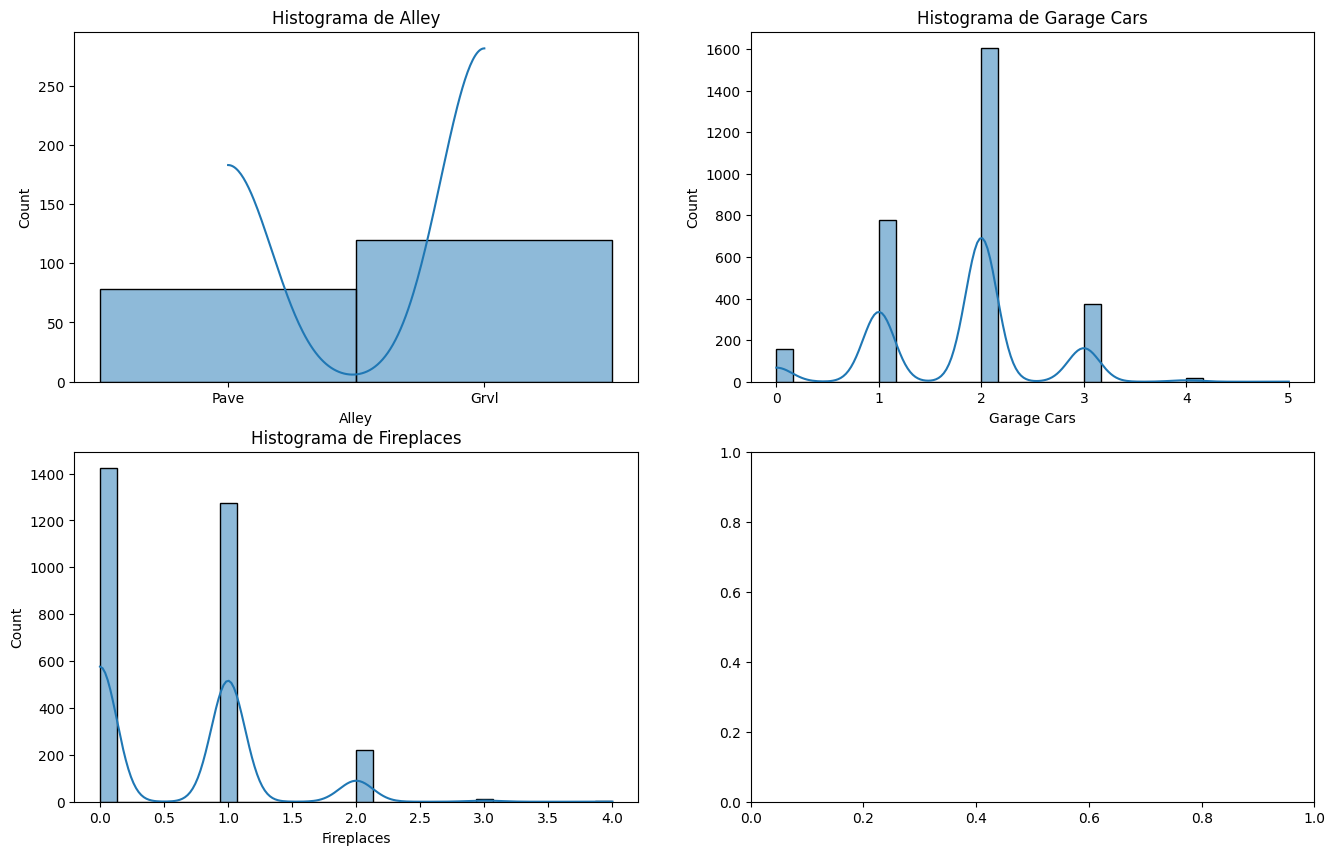

In [8]:
# Crear histogramas
plt.figure(figsize=(16, 10))
for i, var in enumerate(['Alley', 'Garage Cars', 'Fireplaces', 'Fireplaces Qu'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[var], bins=30, kde=True)
    plt.title(f'Histograma de {var}')
plt.tight_layout()
plt.show()